<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99_%ED%96%89%EB%A0%AC_%EC%BD%94%EB%93%9C%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#역행렬

In [2]:
import numpy as np

#역행렬
A = np.array([[2,5,7],
              [6,3,4],
              [5,-2,-3]])
np.linalg.inv(A)

array([[  1.,  -1.,   1.],
       [-38.,  41., -34.],
       [ 27., -29.,  24.]])

In [7]:
#대각행렬
A = np.diag([1,2,3])
print("A")
print(A)
print("역행렬 (대각행렬의 역행렬은 1/x)")
print(np.linalg.inv(A))

A
[[1 0 0]
 [0 2 0]
 [0 0 3]]
역행렬 (대각행렬의 역행렬은 1/x)
[[1.         0.         0.        ]
 [0.         0.5        0.        ]
 [0.         0.         0.33333333]]


In [10]:
#특이행렬의 역행렬은 안됨. 오류내용 : Singular matrix
A = np.array([[1,2],[2,4]])
np.linalg.inv(A)

LinAlgError: Singular matrix

In [12]:
#특이행렬 되려다가 만 거의 특이행렬은 역행렬 됨.
A = np.array([[1,1.00000001],[1,1]])
np.linalg.inv(A)

array([[-1.00000001e+08,  1.00000002e+08],
       [ 1.00000001e+08, -1.00000001e+08]])

#전치

In [14]:
A = np.array([[2,5,7],
              [6,3,4],
              [5,-2,-3]])
A.T

array([[ 2,  6,  5],
       [ 5,  3, -2],
       [ 7,  4, -3]])

In [18]:
#3차원 Tensor 전치
A = np.array([[[1,2],[3,4]], [[5,6],[7,8]]])
print("3차원 Tensor")
print(A)
print("2,3 차원 전치")
print(A.transpose(0,2,1))

3차원 Tensor
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
2,3 차원 전치
[[[1 3]
  [2 4]]

 [[5 7]
  [6 8]]]


In [19]:
#직교행렬 (Orthogonal Matrix)
A = np.array([[1,2],[3,4],[5,6]])
U, S, VT = np.linalg.svd(A)

In [20]:
U

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [21]:
#UUT = T. 대각성분은 다 1이고 나머지는 0이다. (대각성분 제외한 나머지는 0에 아주 가까운 숫자들이 나옴)
U @ U.T

array([[ 1.00000000e+00, -6.06602824e-17, -8.06921612e-17],
       [-6.06602824e-17,  1.00000000e+00,  2.08316059e-17],
       [-8.06921612e-17,  2.08316059e-17,  1.00000000e+00]])

In [22]:
U.T @ U

array([[ 1.00000000e+00,  5.61546194e-17,  6.38142114e-17],
       [ 5.61546194e-17,  1.00000000e+00, -3.57058492e-18],
       [ 6.38142114e-17, -3.57058492e-18,  1.00000000e+00]])

In [24]:
#allclose : 입력한 두 행렬이 같은지 아닌지 확인하는 np 함수.
#==로 비교하면 0.0000000001의 차이만 있어도 False를 리턴하지만 행렬의 경우 e-17까지 가는 경우가 많다보니 어느정도의 오류를 용인하는 함수를 사용.

print(np.allclose(np.eye(3), U @ U.T))
print(np.allclose(np.eye(3), U.T @ U))


True
True


#행렬식

In [31]:
#행렬식 : 0.9999,, 로 출력되는데 사실 1
A = np.array([[3,2,1,2],[7,5,2,5],[0,0,9,4],[0,0,11,5]])
print(np.linalg.det(A))

#특이행렬의 행렬식 값 : 0
A = np.array([[1,2],[2,4]])
print(np.linalg.det(A))

0.9999999999999987
0.0


In [27]:
#거의 특이행렬의 행렬식 값 : 거의 0
A = np.array([[1,1.0000001],[1,1]])
np.linalg.det(A)

np.float64(-1.0000000005838665e-07)

#PD, ND, ID
Positive Definiteness 양의 정부호, Negative Definiteness 음의 정부호, Indefiniteness 정의 불가능 시각화해보기


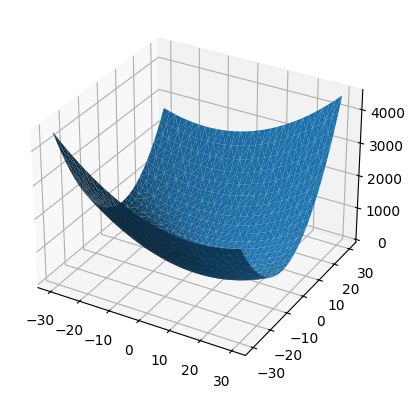

In [36]:
import matplotlib.pyplot as plt

A = np.array([[1,0.5],[0.5,3]])

line = np.linspace(-30, 30, 30)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Y = ((Xgrid @ A) * Xgrid).sum(axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Y, linewidth = 0.2, antialiased = True)

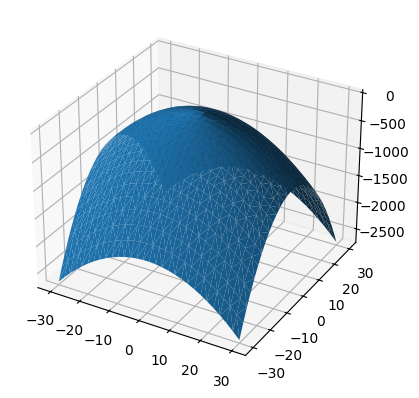

In [39]:
import matplotlib.pyplot as plt

A = np.array([[-1, 0],[0, -2]])

line = np.linspace(-30, 30, 30)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Y = ((Xgrid @ A) * Xgrid).sum(axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Y, linewidth = 0.2, antialiased = True)

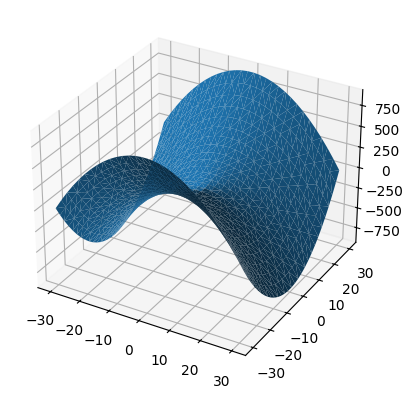

In [40]:
import matplotlib.pyplot as plt

A = np.array([[-1, 0],[0, 1]])

line = np.linspace(-30, 30, 30)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Y = ((Xgrid @ A) * Xgrid).sum(axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Y, linewidth = 0.2, antialiased = True)